In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

# Chapter 2: Simple Comparative Experiments (Sections 2.1–2.6)

## 2.1 Introduction
- Goal: Compare **two conditions (treatments)** and decide if they produce different results.
- Example: Does adding polymer latex to cement mortar change curing time or strength?
- Key idea: Observed differences may be due to:
  1. **True treatment effect**
  2. **Random variation (noise)**

We use **statistical inference** to separate signal from noise.

---

## 2.2 Random Sampling and Sampling Distributions
- A **random sample** means each observation is independent and equally likely.
- Let’s say we have two populations with means:
  - Population 1 mean: $$\mu_1$$
  - Population 2 mean: $$\mu_2$$
- Sample means:
  - $$\bar{y}_1 = \frac{1}{n_1}\sum_{i=1}^{n_1} y_{i1}$$
  - $$\bar{y}_2 = \frac{1}{n_2}\sum_{i=1}^{n_2} y_{i2}$$
- Sampling distributions tell us how these statistics behave over repeated experiments.

**Central Limit Theorem (CLT):**
- For large $n$, sample mean $$\bar{y}$$ follows approximately a normal distribution:
  $$
  \bar{y} \sim N\left(\mu, \frac{\sigma^2}{n}\right)
  $$

---

## 2.3 Comparing Two Means: The Two-Sample t-Test
We want to test:
- Null hypothesis: $$H_0 : \mu_1 = \mu_2$$
- Alternative hypothesis: $$H_a : \mu_1 \neq \mu_2$$ (two-sided)

### Equal variance assumption
If both populations have variance $$\sigma^2$$:
- **Pooled variance estimate**:
  $$
  s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
  $$
- **Test statistic**:
  $$
  t_0 = \frac{\bar{y}_1 - \bar{y}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
  $$
- Degrees of freedom: $$df = n_1 + n_2 - 2$$

### **Example**:
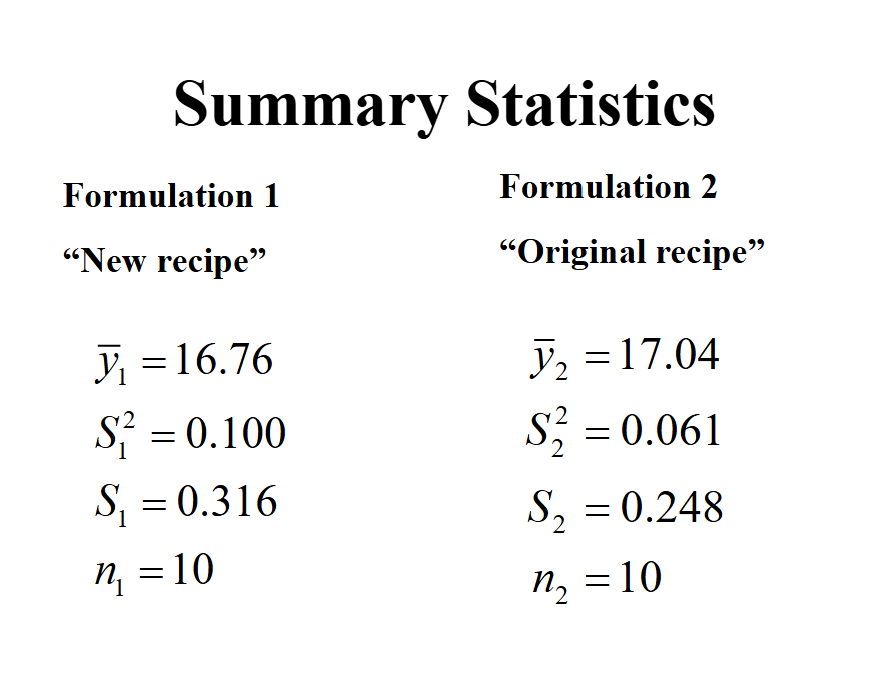

In [1]:
# -------------------------------------------------------
# Two-Sample t-Test / z-Test Notes
# -------------------------------------------------------

# 1. Hypotheses
# Null hypothesis (H0): μ1 = μ2
# Alternative hypothesis (Ha): μ1 ≠ μ2

# 2. Sample statistics (given)
y1_bar = 16.76   # sample mean of group 1
y2_bar = 17.04   # sample mean of group 2
n1 = 10          # sample size group 1
n2 = 10          # sample size group 2

# Sample variances
S1_sq = 0.100    # variance of group 1
S2_sq = 0.061    # variance of group 2

# (standard deviations are just sqrt of variances)
S1 = S1_sq ** 0.5
S2 = S2_sq ** 0.5

# 3. Difference in sample means
diff_means = y1_bar - y2_bar   # observed difference
# -> should be -0.28

# 4. Standard error of the difference in means
# Formula: sqrt( (S1^2 / n1) + (S2^2 / n2) )
import math
SE = math.sqrt((S1_sq / n1) + (S2_sq / n2))

# 5. Test statistic (t or z)
# Formula: Z0 = (y1_bar - y2_bar) / SE
Z0 = diff_means / SE

# 6. Critical values for 5% significance (two-tailed)
# Normal distribution critical values at α = 0.05 are ±1.96
Z_critical = 1.96

# 7. Decision rule
if abs(Z0) > Z_critical:
    decision = "Reject H0 (means are significantly different)"
else:
    decision = "Fail to reject H0 (no significant difference)"

# 8. Print results
print("Difference in means =", diff_means)
print("Standard error =", round(SE, 4))
print("Test statistic Z0 =", round(Z0, 2))
print("Decision:", decision)

# -------------------------------------------------------
# End of notes
# -------------------------------------------------------


Difference in means = -0.2799999999999976
Standard error = 0.1269
Test statistic Z0 = -2.21
Decision: Reject H0 (means are significantly different)


---

## 2.4 Confidence Intervals for Difference of Means
- A **confidence interval** estimates the range where the true difference lies.
- Formula:
  $$
  (\bar{y}_1 - \bar{y}_2) \pm t_{\alpha/2, df} \cdot s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}
  $$

Interpretation: With 95% confidence, the true mean difference lies in this interval.

---

## 2.5 Paired t-Test (Blocking Principle)
- Sometimes samples are **naturally paired** (before/after, same subject, same material piece).
- Define **differences**:
  $$
  d_i = y_{i1} - y_{i2}
  $$
- Mean of differences:
  $$
  \bar{d} = \frac{1}{n} \sum_{i=1}^n d_i
  $$
- Standard deviation:
  $$
  s_d = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (d_i - \bar{d})^2}
  $$
- Test statistic:
  $$
  t_0 = \frac{\bar{d}}{s_d / \sqrt{n}}, \quad df = n-1
  $$
- Blocks (pairs) reduce **unexplained variability** → more powerful test.

---

## 2.6 The Summary
- To compare two groups:
  - If samples are independent → **two-sample t-test**
  - If samples are paired → **paired t-test**
- Always check assumptions:
  1. Normality (especially with small $n$)
  2. Equal variances (for pooled $t$-test)
  3. Independence

---

# Python Examples

```python
import numpy as np
import scipy.stats as stats

# Example: Two-sample t-test
group1 = np.array([16.5, 16.7, 17.1, 16.8, 16.9, 17.0, 16.6, 16.7, 16.8, 16.9])
group2 = np.array([17.0, 17.2, 16.9, 17.1, 17.3, 17.0, 17.1, 17.2, 17.1, 17.2])

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
print("Two-sample t-test:")
print("t-statistic =", t_stat, "p-value =", p_value)

# Example: Paired t-test (before vs after)
before = np.array([45, 47, 50, 46, 48])
after  = np.array([44, 46, 49, 45, 47])

t_stat, p_value = stats.ttest_rel(before, after)
print("\nPaired t-test:")
print("t-statistic =", t_stat, "p-value =", p_value)


# Chapter 2: Simple Comparative Experiments (Complete Notes)

These notes combine the basics of **introductory statistics** with the new material you need (F-test & ANOVA) in the correct order, so you can fully understand the chapter.

---

## 2.1 Introduction
- Goal: Compare **two conditions (treatments)** and decide if they produce different results.  
- Example: Does adding polymer latex to cement mortar change curing time or strength?  
- Key idea: Observed differences may be due to:  
  1. **True treatment effect** (real difference between groups)  
  2. **Random variation (noise)**  

We use **statistical inference** to separate **signal** (true effect) from **noise** (random chance).

---

## 2.2 Random Sampling and Sampling Distributions
- A **random sample** means each observation is independent and equally likely.  
- Let’s say we have two populations with means:  
  - Population 1 mean: $\mu_1$  
  - Population 2 mean: $\mu_2$  

### Sample means:
- $\bar{y}_1 = \frac{1}{n_1}\sum_{i=1}^{n_1} y_{i1}$  
- $\bar{y}_2 = \frac{1}{n_2}\sum_{i=1}^{n_2} y_{i2}$  

### Central Limit Theorem (CLT)
- For large $n$, the sample mean is approximately normal:  
  $$
  \bar{y} \sim N\left(\mu, \frac{\sigma^2}{n}\right)
  $$

---

## 2.3 Comparing Two Means: The Two-Sample t-Test
We want to test if two population means are equal.

### Hypotheses
- $H_0 : \mu_1 = \mu_2$  
- $H_a : \mu_1 \neq \mu_2$  

### Equal variance assumption
If both populations have the same variance $\sigma^2$:  

- **Pooled variance estimate**:  
  $$
  s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
  $$

- **Test statistic**:  
  $$
  t_0 = \frac{\bar{y}_1 - \bar{y}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
  $$

- Degrees of freedom:  
  $$
  df = n_1 + n_2 - 2
  $$

---

## 2.3.1 Test for Equality of Variances (F-test)

### Why?
- The pooled $t$-test assumes **equal variances**.  
- We check this assumption using the **F-test**.

### Hypotheses
- $H_0 : \sigma_1^2 = \sigma_2^2$  
- $H_a : \sigma_1^2 \neq \sigma_2^2$  

### Test statistic
$$
F = \frac{s_1^2}{s_2^2}
$$  

- Put the **larger variance in the numerator** so $F \geq 1$.  
- Degrees of freedom:  
  - Numerator: $df_1 = n_1 - 1$  
  - Denominator: $df_2 = n_2 - 1$  

### Decision rule
For a two-sided test with $\alpha = 0.05$:  
Reject $H_0$ if  
$$
F > F_{1-\alpha/2, df_1, df_2} \quad \text{or} \quad F < F_{\alpha/2, df_1, df_2}
$$  

---

## 2.4 Confidence Intervals for Difference of Means
A **confidence interval** estimates the plausible range of the true difference.  

Formula (equal variances):  
$$
(\bar{y}_1 - \bar{y}_2) \pm t_{\alpha/2, df} \cdot s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}
$$  

Interpretation: With 95% confidence, the true mean difference lies in this interval.

---

## 2.5 Paired t-Test (Blocking Principle)

Sometimes samples are **paired** (before/after, same subject, same material).  

- Differences:  
  $$
  d_i = y_{i1} - y_{i2}
  $$  

- Mean difference:  
  $$
  \bar{d} = \frac{1}{n} \sum_{i=1}^n d_i
  $$  

- Standard deviation of differences:  
  $$
  s_d = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (d_i - \bar{d})^2}
  $$  

- Test statistic:  
  $$
  t_0 = \frac{\bar{d}}{s_d / \sqrt{n}}, \quad df = n-1
  $$  

**Blocking** removes variability due to differences between pairs, making the test more powerful.

---

## 2.6 The F-Distribution (Big Picture)

### Definition
The **F-distribution** arises from the ratio of two independent chi-square variables divided by their degrees of freedom:  
$$
F = \frac{(\chi^2_{df_1}/df_1)}{(\chi^2_{df_2}/df_2)}
$$ 

### Properties
- Only takes **positive** values.  
- Skewed right (not symmetric).  
- Shape depends on $df_1$ and $df_2$.  
- As $df_1, df_2$ get large, the F-distribution becomes more symmetric.

### Uses
1. **Test for equality of two variances**.  
2. **ANOVA** (to test if group means differ).  
3. **Regression** (overall significance of the regression model).  

---

## 2.7 Introduction to ANOVA (Analysis of Variance)

### Why ANOVA?
- The two-sample t-test only compares **two groups**.  
- For **3 or more groups**, we need ANOVA.  

### Hypotheses
- $H_0$: All group means are equal.  
- $H_a$: At least one mean differs.  

### Idea
- Split variability into:
  - **Between-group variability (MSB)** → due to treatment effects.  
  - **Within-group variability (MSW)** → due to random error.  

- Test statistic:  
  $$
  F = \frac{\text{MSB}}{\text{MSW}}
  $$  

- Degrees of freedom:  
  - Numerator: $df_1 = a - 1$ (number of groups minus 1).  
  - Denominator: $df_2 = a(n-1)$ (total error df if equal group sizes).  

If $F$ is large → reject $H_0$, conclude at least one group mean is different.  

---

## 2.8 The Summary
When comparing groups:  
1. **Check assumptions**: independence, normality, equal variances.  
2. **If comparing 2 independent groups**:  
   - Variances equal → pooled two-sample t-test.  
   - Variances unequal → Welch’s t-test.  
3. **If comparing 2 paired groups** → paired t-test.  
4. **If comparing more than 2 groups** → ANOVA (F-test).  
5. Use **confidence intervals** to estimate effect size, not just test significance.  

---

## Python Examples

### F-test (test equality of variances)
```python
import scipy.stats as stats

s1 = 2.1**2   # sample variance for group 1
s2 = 1.2**2   # sample variance for group 2
n1, n2 = 8, 10

# Test statistic (larger variance on top)
F = s1/s2
df1, df2 = n1-1, n2-1

alpha = 0.05
F_upper = stats.f.ppf(1 - alpha/2, df1, df2)
F_lower = stats.f.ppf(alpha/2, df1, df2)

# Two-sided p-value
p_value = 2 * min(stats.f.cdf(F, df1, df2), 1 - stats.f.cdf(F, df1, df2))

print("F =", F)
print("Degrees of freedom: df1 =", df1, ", df2 =", df2)
print("Critical region: F < {:.3f} or F > {:.3f}".format(F_lower, F_upper))
print("p-value =", p_value)


## 2.3.1 Test for Equality of Variances (F-test)

Before using the pooled two-sample t-test, we need to check if variances are equal.

Hypotheses:
- $H_0 : \sigma_1^2 = \sigma_2^2$
- $H_a : \sigma_1^2 \neq \sigma_2^2$

Test statistic:
$$
F = \frac{s_1^2}{s_2^2}
$$
with degrees of freedom:
- Numerator: $df_1 = n_1 - 1$
- Denominator: $df_2 = n_2 - 1$

Decision rule:
- For $\alpha = 0.05$ (two-sided), reject $H_0$ if $F < F_{0.025, df_1, df_2}$ or $F > F_{0.975, df_1, df_2}$.


In [1]:
import numpy as np
from scipy import stats

## **Two-sample t-test**:

In [2]:
import numpy as np

group1 = np.array([16.5, 16.7, 17.1, 16.8, 16.9, 17.0, 16.6, 16.7, 16.8, 16.9])
group2 = np.array([17.0, 17.2, 16.9, 17.1, 17.3, 17.0, 17.1, 17.2, 17.1, 17.2])

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
print("Two-sample t-test:")
print("t-statistic =", t_stat, "p-value =", p_value)


Two-sample t-test:
t-statistic = -4.490082311142916 p-value = 0.0002831262105953486


## **Paired t-test**:

In [ ]:
before = np.array([45, 47, 50, 46, 48])
after  = np.array([44, 46, 49, 45, 47])
#test
t_stat, p_value = stats.ttest_rel(before, after)
print("Paired t-test:")
print("t-statistic =", t_stat, "p-value =", p_value)


Paired t-test:
t-statistic = inf p-value = 0.0


c:\Users\visnu\anaconda3\envs\02411\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
